In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Comparing means of two populations

In [51]:
x = np.random.normal(loc=5, scale=1, size=20)
y = np.random.normal(loc=6, scale=1, size=20)

(array([0.0922353 , 0.        , 0.1844706 , 0.1844706 , 0.36894121,
        0.55341181, 0.46117651]),
 array([3.23336281, 3.77545461, 4.3175464 , 4.85963819, 5.40172999,
        5.94382178, 6.48591357, 7.02800536]),
 <a list of 7 Patch objects>)

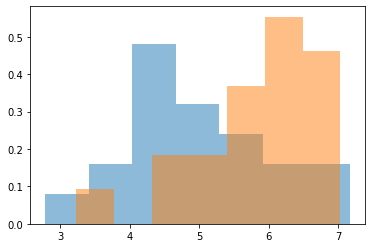

In [70]:
plt.hist(x, alpha=0.5, density=True, bins=7)
plt.hist(y, alpha=0.5, density=True, bins=7)

In [71]:
x.mean()

4.9593834629017355

In [72]:
x.std()

1.1098335562092811

In [73]:
y.mean()

5.855866280493967

In [74]:
y.std()

0.9128626501008326

In [75]:
import scipy.stats as stats

## Unpaired 2-sample t-test 

In [76]:
stats.ttest_ind(x,y)

Ttest_indResult(statistic=-2.719278051236666, pvalue=0.009807306175231857)

10
Ttest_indResult(statistic=-2.516309002737602, pvalue=0.021563733458206252)
------------------
20
Ttest_indResult(statistic=-1.5696398624468417, pvalue=0.12478944812319812)
------------------
30
Ttest_indResult(statistic=-1.726539719570829, pvalue=0.08957370803881214)
------------------
100
Ttest_indResult(statistic=-3.7587218012702115, pvalue=0.00022468546555573526)
------------------
1000
Ttest_indResult(statistic=-10.628558771114566, pvalue=1.0511686332860548e-25)
------------------


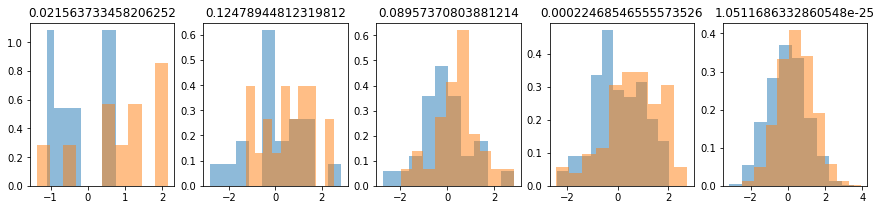

In [11]:
mu1 = 0
mu2 = 0.5
sigma1 = 1
sigma2 = 1

f, axs = plt.subplots(1,5, figsize=(15,3))
for i, n in enumerate([10, 20, 30, 100, 1000]):
    x = np.random.normal(loc=mu1, scale=sigma1, size=n)
    y = np.random.normal(loc=mu2, scale=sigma2, size=n)
    axs[i].hist(x, alpha=0.5, density=True)
    axs[i].hist(y, alpha=0.5, density=True)
    
    print(n)
    print(stats.ttest_ind(x,y))
    axs[i].set_title(stats.ttest_ind(x,y).pvalue)
    print('------------------')

### Equal variances?

In [83]:
n_samples = 50

Ttest_indResult(statistic=-1.677309385577176, pvalue=0.09666887190469736)


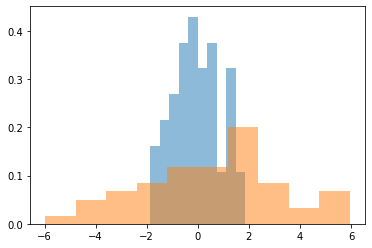

In [84]:
mu1 = 0
mu2 = 1

sigma1 = 1
sigma2 = 3
x = np.random.normal(loc=mu1, scale=sigma1, size=n_samples)
y = np.random.normal(loc=mu2, scale=sigma2, size=n_samples)
plt.hist(x, alpha=0.5, density=True)
plt.hist(y, alpha=0.5, density=True)

print(stats.ttest_ind(x,y))

In [14]:
print(stats.ttest_ind(x,y))

Ttest_indResult(statistic=-1.2082809343804013, pvalue=0.22984678288592697)


In [15]:
stats.ttest_ind(x,y).pvalue

0.22984678288592697

In [16]:
stats.mannwhitneyu(x,y, alternative='two-sided')

MannwhitneyuResult(statistic=1037.0, pvalue=0.14293818231643227)

In [86]:
n_iter = 1000

In [87]:
mus1 = [0, 0]
mus2 = [0, 1]
for mu, mu2 in zip(mus1, mus2):
    t_reject_count = 0
    mwu_reject_count = 0    
    for i in range(n_iter):    
        x = np.random.normal(loc=mu1, scale=sigma1, size=n_samples)
        y = np.random.normal(loc=mu2, scale=sigma2, size=n_samples)
        t_pvalue = stats.ttest_ind(x,y).pvalue
        mwu_pvalue = stats.mannwhitneyu(x,y, alternative='two-sided').pvalue
        t_reject = int(t_pvalue < 0.05) # 0 or 1
        t_reject_count += t_reject
        mwu_reject = int(mwu_pvalue < 0.05) # 0 or 1
        mwu_reject_count += mwu_reject
    print('Mu:', mu1, mu2)
    print('h0 rejected by mann-whitney:', mwu_reject_count)
    print('h0 rejected by t:',t_reject_count)
    

Mu: 0 0
h0 rejected by mann-whitney: 72
h0 rejected by t: 59
Mu: 0 1
h0 rejected by mann-whitney: 579
h0 rejected by t: 603


### Normality?

In [ ]:
# laplace distribution

https://stats.stackexchange.com/questions/253127/is-the-inference-from-a-parametric-test-valid-when-the-population-distribution-i/253318#253318

Ttest_indResult(statistic=-1.4401359714726585, pvalue=0.1530159767421459)
MannwhitneyuResult(statistic=1047.0, pvalue=0.08135746969460378)


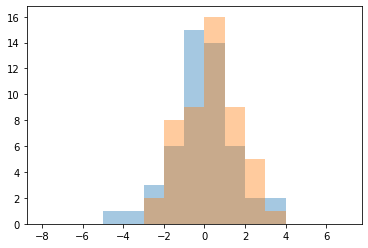

In [99]:
sample_size=50
loc1=0
loc2=0.5
x1 = np.random.laplace(loc=loc1, scale=1.0, size=sample_size)
x2 = np.random.laplace(loc=loc2, scale=1.0, size=sample_size)
plt.hist(x1, alpha=0.4, bins=np.arange(-8,8))
plt.hist(x2, alpha=0.4, bins=np.arange(-8,8))
p_t = stats.ttest_ind(x1,x2)
p_mwu = stats.mannwhitneyu(x1,x2)
print(p_t)
print(p_mwu)

In [ ]:
# power = P(reject H0 | H1 is true)
# H0: mu1=mu2
# H1: mu1!=mu2
# type 1 error: P(reject H0 | H0 is true) == alpha?


In [100]:
def errors_check(distrib_generator, n_samples, n_iterations, loc1=0, loc2=0):
    pvalues_t = np.zeros(n_iterations)
    pvalues_mwu = np.zeros(n_iterations)
    for i in range(n_iterations):
        x1 = distrib_generator(loc=loc1, scale=1.0, size=n_samples)
        x2 = distrib_generator(loc=loc2, scale=1.0, size=n_samples)
        pvalues_t[i] = stats.ttest_ind(x1,x2).pvalue
        pvalues_mwu[i] = stats.mannwhitneyu(x1,x2,alternative='two-sided').pvalue
    #pvalues_t = np.array(pvalues_t)
    
    for test_name, pvals in zip(['t-test','MWu-test'],[pvalues_t, pvalues_mwu]):
        rejected = pvals < 0.05
        n_rejected = rejected.sum()
        n_accepted = n_iterations - n_rejected
        print(test_name)
        print('accepted: {}/{}'.format(n_accepted, n_iterations))
        print('rejected: {}/{}'.format(n_rejected, n_iterations))
        if loc1==loc2:
            print('Type 1 error:', n_rejected/n_iterations)
        if loc1!=loc2:
            print('effect size:', loc2-loc1)
            print('Type 2 error:', n_accepted/n_iterations)

In [101]:
errors_check(np.random.laplace, n_samples=50, n_iterations=10000)

t-test
accepted: 9478/10000
rejected: 522/10000
Type 1 error: 0.0522
MWu-test
accepted: 9489/10000
rejected: 511/10000
Type 1 error: 0.0511


In [102]:
errors_check(np.random.laplace, n_samples=50, n_iterations=10000, loc1=0, loc2=0.5)

t-test
accepted: 5650/10000
rejected: 4350/10000
effect size: 0.5
Type 2 error: 0.565
MWu-test
accepted: 4398/10000
rejected: 5602/10000
effect size: 0.5
Type 2 error: 0.4398


In [103]:
# plot power of effect_size
def get_powers_t_mwu(a, b, sample_generator, n_iterations, n_samples=50, num=101):
    reject_rates = np.zeros([2, num])
    i_effect=0
    effect_sizes = np.linspace(a,b,num)
    for effect_size in effect_sizes:
        pvalues_t = np.zeros(n_iterations)
        pvalues_mwu = np.zeros(n_iterations)
        loc1=0
        loc2=effect_size
        for i in range(n_iterations):
            x1 = sample_generator(loc=loc1, scale=1.0, size=n_samples)
            x2 = sample_generator(loc=loc2, scale=1.0, size=n_samples)
            pvalues_t[i] = stats.ttest_ind(x1,x2).pvalue
            pvalues_mwu[i] = stats.mannwhitneyu(x1,x2, alternative='two-sided').pvalue
        for itest, pvals in enumerate([pvalues_t, pvalues_mwu]):
            rejected = pvals < 0.05
            n_rejected = rejected.sum()
            reject_rate = n_rejected / n_iterations
            reject_rates[itest,i_effect]= reject_rate
        i_effect+=1
    return effect_sizes, reject_rates

In [104]:
effect, pows = get_powers_t_mwu(0,3,np.random.laplace, 1000, 200)

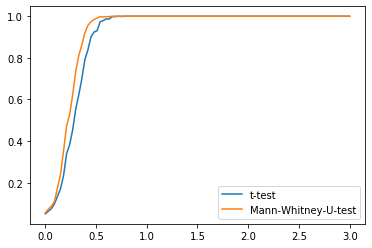

In [105]:
plt.plot(effect, pows[0,:], label='t-test')
plt.plot(effect, pows[1,:], label='Mann-Whitney-U-test')
plt.legend()

In [106]:
x1 = np.random.laplace(loc=0, scale=1.0, size=1000)
print(x1.mean())
print(x1.std())


-0.044774871292566076
1.3584337683227283


In [107]:
x1 = np.random.laplace(loc=1, scale=1.0, size=1000)
print(x1.mean())
print(x1.std())

0.976945238069981
1.3428663770306803


In [108]:
effect, pows_normal = get_powers_t_mwu(0,1.5,np.random.normal, 1000, num=200)

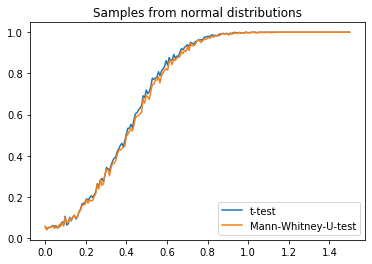

In [109]:
plt.plot(effect, pows_normal[0,:], label='t-test')
plt.plot(effect, pows_normal[1,:], label='Mann-Whitney-U-test')
plt.title('Samples from normal distributions')
plt.legend()

In [110]:
effect, pows_normal_20 = get_powers_t_mwu(0,1.5,np.random.normal, 1000, n_samples=20, num=200)

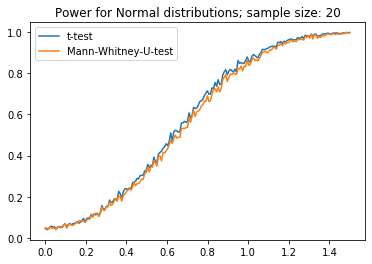

In [111]:
plt.plot(effect, pows_normal_20[0,:], label='t-test')
plt.plot(effect, pows_normal_20[1,:], label='Mann-Whitney-U-test')
plt.title('Power for Normal distributions; sample size: 20')
plt.legend()

In [115]:
sample_size = 100
n_iterations=200
number_points = 100

effect, pows_normal_cur = get_powers_t_mwu(0,1.5,np.random.normal, n_iterations, n_samples=sample_size, num=number_points)

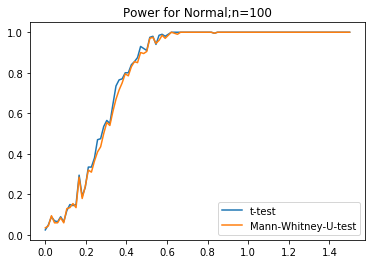

In [116]:
plt.plot(effect, pows_normal_cur[0,:], label='t-test')
plt.plot(effect, pows_normal_cur[1,:], label='Mann-Whitney-U-test')
plt.title('Power for Normal;n={}'.format(sample_size))
plt.legend()

## Example: paired vs unpaired (dependent / independent)

In [118]:
import seaborn as sns

In [121]:
# np.random.normal?

In [122]:
x1 = np.random.normal(5,1,size=20)

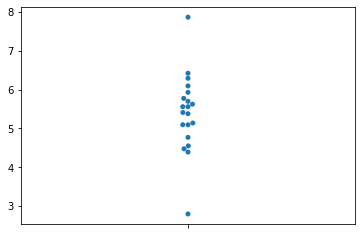

In [123]:
sns.swarmplot(y=x1)

In [124]:
difference = np.random.normal(0.2,0.2, 20)


In [125]:
difference

array([ 0.00598391,  0.42774874,  0.59378932,  0.29636803,  0.21374978,
        0.41707171,  0.46826328, -0.27053673, -0.04731078,  0.07275869,
        0.41313584, -0.00351753,  0.43794711,  0.38769244, -0.03790236,
        0.30005411,  0.00255286,  0.29725906,  0.29126421,  0.13671725])

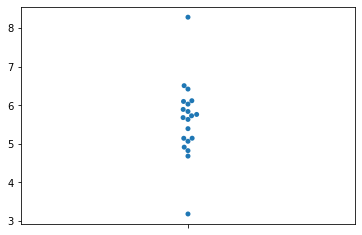

In [126]:
sns.swarmplot(y=(x1 + difference))

In [127]:
x_gr = x1+difference

In [128]:
import pandas as pd

In [129]:
df = pd.DataFrame({'x': x1, 'y': x_gr})

In [130]:
# df

In [131]:
df.describe()

,x,y
count,20.000000,20.000000
mean,5.396255,5.616409
std,1.001252,0.974802
min,2.795827,3.183520
25%,5.012989,5.124462
50%,5.485048,5.703076
75%,5.812748,6.046088
max,7.866612,8.279748


In [132]:
melted = df.melt(value_vars=['x', 'y'], var_name='sample')

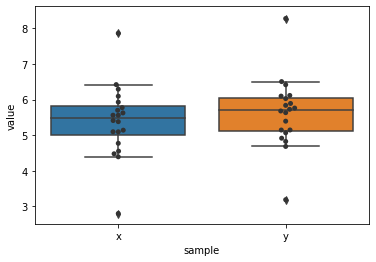

In [133]:
sns.swarmplot(x='sample', y='value', data=melted, color="0.2")
sns.boxplot(x='sample', y='value', data=melted)

In [134]:
stats.ttest_ind(df.x, df.y)

Ttest_indResult(statistic=-0.7045628238551145, pvalue=0.48537831291158395)

In [135]:
stats.ttest_rel(df.x, df.y)

Ttest_relResult(statistic=-4.357780748762539, pvalue=0.00033874263765778487)

([<matplotlib.axis.XTick at 0x7f6e8f347860>,
 <a list of 2 Text xticklabel objects>)

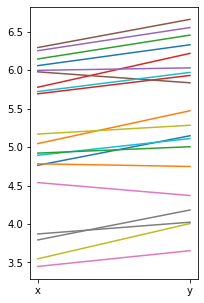

In [157]:
plt.figure(figsize=(3,5))
plt.plot(df.values.T)
plt.xticks([0,1], ['x','y'])

# ANOVA

https://pythonfordatascience.org/anova-python/

https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

In [3]:
texxt_table = """Low Calorie

Low Fat

Low Carbohydrate

Control

8

2

3

2

9

4

5

2

6

3

4

-1

7

5

2

0

3

1

3

3"""

In [4]:
texxt_table

'Low Calorie\n\nLow Fat\n\nLow Carbohydrate\n\nControl\n\n8\n\n2\n\n3\n\n2\n\n9\n\n4\n\n5\n\n2\n\n6\n\n3\n\n4\n\n-1\n\n7\n\n5\n\n2\n\n0\n\n3\n\n1\n\n3\n\n3'

In [5]:
rows = texxt_table.split('\n')

In [16]:
rows_ = [x for x in rows if x!='']

In [17]:
rows_

['Low Calorie',
 'Low Fat',
 'Low Carbohydrate',
 'Control',
 '8',
 '2',
 '3',
 '2',
 '9',
 '4',
 '5',
 '2',
 '6',
 '3',
 '4',
 '-1',
 '7',
 '5',
 '2',
 '0',
 '3',
 '1',
 '3',
 '3']

In [23]:
rows_arr = np.array(rows_).reshape((-1,4))

In [24]:
rows_arr

array([['Low Calorie', 'Low Fat', 'Low Carbohydrate', 'Control'],
       ['8', '2', '3', '2'],
       ['9', '4', '5', '2'],
       ['6', '3', '4', '-1'],
       ['7', '5', '2', '0'],
       ['3', '1', '3', '3']], dtype='<U16')

In [25]:
df = pd.DataFrame(rows_arr[1:,:],
                 columns=rows_arr[0,:])

In [26]:
df

,Low Calorie,Low Fat,Low Carbohydrate,Control
0,8,2,3,2
1,9,4,5,2
2,6,3,4,-1
3,7,5,2,0
4,3,1,3,3


In [28]:
df.dtypes

Low Calorie         object
Low Fat             object
Low Carbohydrate    object
Control             object
dtype: object

In [30]:
df = df.astype(float)

In [31]:
df

,Low Calorie,Low Fat,Low Carbohydrate,Control
0,8.0,2.0,3.0,2.0
1,9.0,4.0,5.0,2.0
2,6.0,3.0,4.0,-1.0
3,7.0,5.0,2.0,0.0
4,3.0,1.0,3.0,3.0


In [32]:
df_stats = df.melt(value_vars=df.columns, var_name='group', value_name='weight')

In [33]:
df_stats

,group,weight
0,Low Calorie,8.0
1,Low Calorie,9.0
2,Low Calorie,6.0
3,Low Calorie,7.0
4,Low Calorie,3.0
5,Low Fat,2.0
6,Low Fat,4.0
7,Low Fat,3.0
8,Low Fat,5.0
9,Low Fat,1.0


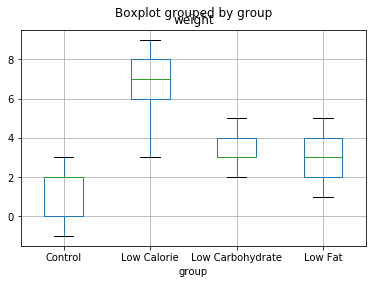

In [36]:
df_stats.boxplot('weight', by='group')

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [38]:
mod = ols('weight ~ group', data=df_stats).fit()

In [39]:
aov_table = sm.stats.anova_lm(mod, typ=2)

In [40]:
aov_table

,sum_sq,df,F,PR(>F)
group,75.75,3.0,8.559322,0.001278
Residual,47.20,16.0,NaN,NaN


In [41]:
group_names = df.columns

In [42]:
group_names

Index(['Low Calorie', 'Low Fat', 'Low Carbohydrate', 'Control'], dtype='object')

In [43]:
w_values = [df[group] for group in group_names]

In [47]:
w_values

[0    8.0
 1    9.0
 2    6.0
 3    7.0
 4    3.0
 Name: Low Calorie, dtype: float64, 0    2.0
 1    4.0
 2    3.0
 3    5.0
 4    1.0
 Name: Low Fat, dtype: float64, 0    3.0
 1    5.0
 2    4.0
 3    2.0
 4    3.0
 Name: Low Carbohydrate, dtype: float64, 0    2.0
 1    2.0
 2   -1.0
 3    0.0
 4    3.0
 Name: Control, dtype: float64]

In [48]:
stats.f_oneway(*w_values)

F_onewayResult(statistic=8.559322033898304, pvalue=0.0012777417892066623)

In [49]:
print(mod.summary())


                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     8.559
Date:                Tue, 28 Jan 2020   Prob (F-statistic):            0.00128
Time:                        13:14:27   Log-Likelihood:                -36.965
No. Observations:                  20   AIC:                             81.93
Df Residuals:                      16   BIC:                             85.91
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

## Proportions

https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html

In [60]:
# 2 groups, H0: p1==p2, Ha: P1!=p2
n_men = 642
n_women = 591
group_size=1000


In [59]:
from statsmodels.stats.proportion import proportions_ztest


In [61]:
count = np.array([n_men, n_women])
nobs = np.array([group_size, group_size])
# nobs = np.array([83, 99])
stat, pval = proportions_ztest(count, nobs)



In [62]:
stat

2.3453407727949207

In [63]:
pval

0.01900969625410689

In [68]:
# 1 group
# is dice fair or not?

In [66]:
stats.binom_test(51, 235, 1.0/6, alternative='two-sided') # exact binomial test

0.043747970182413345

In [69]:
proportions_ztest(51, 235, 1./6) # z-test for proportions

(1.872608670525164, 0.06112244315091697)

In [136]:
## Discrete variables - more than 2

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

In [140]:
obs = np.array([[20, 30, 30], [100, 110, 90]])
stats.chi2_contingency(obs)

(2.5257936507936507,
 0.2828335193186947,
 2,
 array([[ 25.26315789,  29.47368421,  25.26315789],
        [ 94.73684211, 110.52631579,  94.73684211]]))

In [142]:
obs = np.array([[20, 30, 30], [100, 110, 90]]).T
stats.chi2_contingency(obs)

(2.5257936507936507,
 0.2828335193186947,
 2,
 array([[ 25.26315789,  94.73684211],
        [ 29.47368421, 110.52631579],
        [ 25.26315789,  94.73684211]]))

# Literature:

 Flow charts:
  - https://onishlab.colostate.edu/wp-content/uploads/2019/07/which_test_flowchart.png
  - https://onishlab.colostate.edu/wp-content/uploads/2019/07/hypothesis_testing.png
 
 General:
 - https://www.khanacademy.org/math/statistics-probability/ -- some examples were taken from here
 - wikipedia.org
 
 ANOVA:
 - https://www.statsmodels.org/stable/examples/notebooks/generated/interactions_anova.html#One-way-ANOVA
 - https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/
 - http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_HypothesisTesting-ANOVA/BS704_HypothesisTesting-Anova_print.html
  - https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/anova/
 
 (not discussed) 
  - Test for paired discrete variables - McNemar's test (https://en.wikipedia.org/wiki/McNemar%27s_test)
  -  https://lindeloev.github.io/tests-as-linear/linear_tests_cheat_sheet.pdf